# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


1)
In the Passed column, we have 2 Fs and 4Ts. Using the formula we get 
```
Entropy = -( (P+) * log2(P+) + (P-) * log2(P-) )

        = -( 4/6 * log2(4/6) + 2/6 * log2(2/6) )

        = -( 4/6 * log2(2) - log2(3))
        
        = -( 4/6 - log2(3) )
```     
2)
In the passed column, we can have values LF, LT, MF, MT, HF, HT. (for GPA | Passed)

We have 1 LF, 1 LT, 1 MF, 1 MT, 2 HT, 0 HF
```
Entropy = - ( (1/6 * log2(1/6)) * 4 + 2/6 * log2(2/6) )
        
        = - ( 4/6 - log2(3) )
```
3)

In the passed column, we can have values LF, LT, MF, MT, HF, HT. (for Studied | Passed)

We have 2 FF, 3 TT, 1 FT
```
Entropy = - ( 2/6 * log2(2/6) + 3/6 * log2(3/6) + 1/6 * log2(1/6) )
        
        = - ( - 2/6 * log2(3) - 3/6 - 1/6 - 1/6 * log2(3) )
        
        =  2/3 + 1/2 * log2(3)
```

4) 
```
             --------------
            | Original Data| 
             --------------    
                Studied?
                /      \
            T  /        \ F
              /          \
         --------         ------ 
        | Passed |       | Data |
         --------         ------
                           GPA?
                         /  |  \
                      H / M |   \ L
                       /    |    \
                      /     |     \ 
              --------   --------    --------
             | Passed | | Failed |  | Failed |
              --------   --------    --------
```

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

1.

- Entropy is a measurable physical property, that is most commonly associated with a state of disorder, randomness, or uncertainty. This is an idea from information theory, that is used in making decision trees. It is used to judge how good a decision is at segregating data.

- Gini impurity is a measure of impurity, that is used to make decision trees. It tells us how ordered some given data is, and is used to measure how good a decision is in a decision tree.



2. 

- Gini impurity has a **maximum value of 0.5**, which is the worst we can get, and a **minimum value of 0** means the best we can get. 

- In the case of binary distributions (categories are either 1 or 0), the **max value of entropy is 1**, and **0 is lowest value**. In other cases, **the max value is log2(k), where k is the number of categories, and 0 is the min value**.



/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


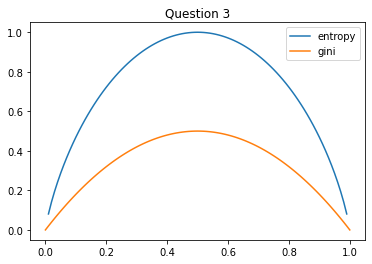

/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/Users/tusharjain/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


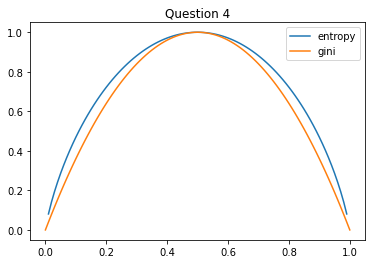

In [20]:
import numpy as np
import matplotlib.pyplot as plt


x_values = np.arange(0,1.01,0.01)
entropy = -(x_values*np.log2(x_values) + (1-x_values)*np.log2(1-x_values))
Gini = 1 - (x_values**2 + (1-x_values)**2)
plt.plot(x_values, entropy, label='entropy')
plt.plot(x_values, Gini, label='gini')
plt.title("Question 3")
plt.legend()
plt.show()

x_values = np.arange(0,1.01,0.01)
entropy = -(x_values*np.log2(x_values) + (1-x_values)*np.log2(1-x_values))
Gini = 2*(1 - (x_values**2 + (1-x_values)**2))
plt.plot(x_values, entropy, label='entropy')
plt.plot(x_values, Gini, label='gini')
plt.title("Question 4")
plt.legend()
plt.show()




### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [21]:

#######################
# Your code goes here #
#######################
import pandas as pd
import numpy as np

# headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('spambase.data', na_values='?', header=None) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [22]:
for i in range(57):
    data[i] = data[i] / data[i].abs().max()
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())    
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.023029,0.014917,0.055031,0.001528,0.031222,0.016310,0.015709,0.009477,0.017123,0.013169,...,0.008797,0.014257,0.004160,0.008285,0.012629,0.002231,0.003805,0.005123,0.017821,0.394045
std,0.067259,0.090376,0.098852,0.032589,0.067251,0.046569,0.053843,0.036100,0.052969,0.035465,...,0.055524,0.027723,0.026806,0.025115,0.040960,0.021652,0.028806,0.019513,0.038280,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000534,0.000501,0.002146,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006665,0.000000,0.000000,0.000000,0.000000,0.001158,0.001402,0.005934,0.000000
75%,0.000000,0.000000,0.082353,0.000000,0.038000,0.000000,0.000000,0.000000,0.000000,0.008801,...,0.000000,0.019278,0.000000,0.009699,0.008662,0.000000,0.002457,0.004205,0.016730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [23]:
data.loc[: , data.columns==57]

,57
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [24]:
from sklearn.model_selection import train_test_split

x,y = data.loc[: , data.columns!=57], data.loc[: , data.columns==57]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43)

In [25]:
print(x_test)

            0         1         2    3      4         5         6         7   \
1069  0.019824  0.034314  0.115686  0.0  0.039  0.032313  0.000000  0.000000   
233   0.000000  0.000000  0.141176  0.0  0.181  0.000000  0.000000  0.000000   
2545  0.000000  0.000000  0.031373  0.0  0.064  0.000000  0.000000  0.014401   
69    0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2733  0.000000  0.014006  0.039216  0.0  0.000  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...    ...       ...       ...       ...   
3995  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2560  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2209  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
197   0.037445  0.000000  0.015686  0.0  0.042  0.013605  0.011004  0.037804   
1894  0.024229  0.003501  0.043137  0.0  0.022  0.008503  0.000000  0.000000   

            8         9   ...     47   

You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize K and split the data
k = 5
x_train_split = np.split(x_train, k)
y_train_split = np.split(y_train, k)
tree = DecisionTreeClassifier(max_depth=5, random_state=29)
# tree_gini = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=29)

#Run the K fold Validation and report the scores
for index, _ in enumerate(x_train_split):
    tree.fit(x_train_split[index], y_train_split[index])
    
    predictions = tree.predict(x_train_split[index])
    accuracy = accuracy_score(y_train_split[index], predictions)
    print(f"Training Accuracy: {accuracy}")
    
    predictions = tree.predict(x_train)
    accuracy = accuracy_score(y_train, predictions)
    print(f"Validation Accuracy: {accuracy}")
    
    predictions = tree.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Testing Accuracy: {accuracy}\n\n")

Training Accuracy: 0.9478260869565217
Validation Accuracy: 0.8910144927536232
Testing Accuracy: 0.8757602085143353


Training Accuracy: 0.9492753623188406
Validation Accuracy: 0.8944927536231884
Testing Accuracy: 0.9044309296264118


Training Accuracy: 0.9536231884057971
Validation Accuracy: 0.8991304347826087
Testing Accuracy: 0.893136403127715


Training Accuracy: 0.9492753623188406
Validation Accuracy: 0.903768115942029
Testing Accuracy: 0.896611642050391


Training Accuracy: 0.9391304347826087
Validation Accuracy: 0.9104347826086957
Testing Accuracy: 0.9052997393570807




### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

Answer:
- Boosting: Boosting is a modification that is used to reduce bias and variance. Using it, we can convert weak-learner algorithms (like decision trees) into stronger ones (boosted trees). In boosting, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors.

- Bagging: Bagging is used to reduce the variance of a decision tree. In Bagging, we first creat different subsets of our training data randomly with replacement. We then use these subsets to train multiple decision trees. To get the final prediction, we average out the predictions of our multiple decision trees.

- Stacking: Stacking is like a combination of the above two techniques. In stacking, similar to bagging, we first train multiple weak-learners in parallel and then, similar to Boosting, a meta-model is then trained to make predictions based on their output. 

Random Forest belong to the bagging class. This is because it gives a final prediction using the outputs of many decision trees, which is the core concept of bagging. This allows random forests to provide more robust predictions.

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [27]:
from scipy import stats

class DecisionTree:
    def __init__(self, k):
        self.x = 0
        self.y = 0
        self.k = k
        self.forest = []
    
    def rand_features(self):
        indices = np.random.choice(len(self.x), len(self.x))
        return self.x.iloc[indices].values, self.y.iloc[indices].values
    
    def train(self, x_input, y_input):
        self.x = x_input
        self.y = y_input
        self.forest = []
        for i in range(self.k):
            x_sub, y_sub = self.rand_features()
            dt = DecisionTreeClassifier()
            dt.fit(x_sub, y_sub)
            self.forest.append(dt)
        return self.forest
    
    def mode(self, input_in):
        # Finds the mode in an array
        input_in.sort()
        cur = input_in[0]
        cur_val = 1
        actual = input_in[0]
        actual_val = 1
        for i in range(1,len(input_in)):
            if(input_in[i]==cur):
                cur_val+=1
            else:
                if(cur_val>actual_val):
                    actual_val = cur_val
                    cur = actual
        if(cur_val>actual_val):
            actual_val = cur_val
            cur = actual
        return cur
    
    def point_pred(self, point_in):
        pred_list = [dt.predict([point_in]) for dt in self.forest]
        return self.mode(pred_list[0])

In [28]:
dt = DecisionTree(5)
dt.train(x_train, y_train)

pred = []
for i in x_test.to_numpy():
    pred.append(dt.point_pred(i))


accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9018245004344049
